In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

In [2]:
from talib import EMA, RSI, OBV, APO

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import TimeSeriesSplit 
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [4]:
import re

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Read the downloaded file

In [6]:
df = pd.read_excel("XAUUSD_D1.xlsx",index_col=0, parse_dates=True)

In [7]:
pd.set_option("display.max_rows",None)

In [8]:
df.head(4801)

Open      High       Low     Close  Volume
Date                                                      
2006-12-31   635.679   636.220   635.009   635.699     192
2007-01-01   635.780   638.877   635.006   638.601     856
2007-01-02   638.689   640.994   636.984   639.994    1239
2007-01-03   639.569   644.663   624.634   628.407    1348
2007-01-04   628.916   629.549   619.600   623.430    1372
2007-01-05   623.648   625.768   601.591   606.841     830
2007-01-07   606.711   609.147   606.274   606.916     528
2007-01-08   606.907   613.694   602.943   612.887    1338
2007-01-09   613.222   615.662   605.281   612.390    1334
2007-01-10   612.535   612.930   605.153   611.489    1438
2007-01-11   612.014   615.785   608.678   613.097    1440
2007-01-12   613.527   627.323   610.701   626.233     840
2007-01-14   625.720   627.530   623.679   625.060     600
2007-01-15   624.572   627.767   623.127   626.049    1440
2007-01-16   625.788   627.950   621.981   623.553    1408
2007-01-17   623.052   633.707   619.363   632.052    1375
2007-01-18   632.097   636.480   625.672   628.047    1338
2007-01-19   628.267   636.083   626.352   634.771     804
2007-01-21   634.571   636.070   633.366   634.158     482
2007-01-22   634.191   639.340   631.065   635.363    1364
2007-01-23   635.797   647.615   634.573   641.656    1389
2007-01-24   641.949   648.770   638.015   645.725    1363
2007-01-25   645.963   654.442   643.202   644.470    1350
2007-01-26   644.242   647.833   639.942   645.380     812
2007-01-28   645.262   647.708   643.555   644.146     496
2007-01-29   643.965   647.510   640.028   641.908    1325
2007-01-30   641.942   647.380   639.983   644.998    1353
2007-01-31   644.493   654.648   641.285   652.340    1336
2007-02-01   651.976   661.108   650.819   655.906    1352
2007-02-02   655.957   659.558   642.190   647.066     804
2007-02-04   646.846   649.511   645.207   646.095     526
2007-02-05   646.293   651.687   645.171   650.210    1310
2007-02-06   650.619   658.229   649.671   654.686    1266
2007-02-07   654.761   656.508   650.032   651.135    1187
2007-02-08   651.369   661.240   646.879   658.920    1198
2007-02-09   658.520   668.044   656.227   666.063     769
2007-02-11   666.027   668.107   663.033   665.989     493
2007-02-12   665.945   666.219   659.061   663.656    1342
2007-02-13   663.626   668.870   660.813   668.147    1373
2007-02-14   668.170   671.708   664.370   668.098    1313
2007-02-15   668.088   670.400   661.906   666.011    1301
2007-02-16   665.743   669.060   662.058   668.094     770
2007-02-18   668.315   673.102   666.718   670.461     478
2007-02-19   670.659   671.784   668.735   669.110    1159
2007-02-20   669.276   669.558   655.147   659.182    1366
2007-02-21   659.328   682.247   656.202   677.219    1376
2007-02-22   677.321   680.829   671.910   675.898    1341
2007-02-23   675.672   688.208   675.293   681.920     811
2007-02-25   681.745   687.403   680.718   684.917     532
2007-02-26   684.639   687.731   681.492   682.451    1331
2007-02-27   682.533   688.470   658.578   672.183    1406
2007-02-28   672.122   677.355   660.812   670.431    1390
2007-03-01   670.603   674.607   656.307   661.616    1396
2007-03-02   661.471   663.857   639.779   641.904     817
2007-03-04   641.983   644.617   636.756   639.321     553
2007-03-05   639.436   645.030   631.853   644.112    1400
2007-03-06   644.169   648.107   639.667   642.912    1383
2007-03-07   642.913   653.630   641.749   651.695    1380
2007-03-08   651.885   655.758   648.737   652.698    1352
2007-03-09   652.440   657.897   646.977   648.923     817
2007-03-11   648.741   653.552   647.805   653.076     559
2007-03-12   652.913   653.596   644.849   649.548    1336
2007-03-13   649.775   651.895   639.441   642.133    1359
2007-03-14   641.722   646.398   635.852   644.348    1335
2007-03-15   644.107   650.070   643.076   646.132    1347
2007-03-16   645.927   655.570   645.317   652.398     763
2007

In [9]:
df.columns = [["Open","High","Low","Close","Volume"]]

In [10]:
df=df['2006-12-31':'2022-05-26']

In [11]:
df=df.dropna()
print (df.shape)

(4801, 5)


In [12]:
type(df)

pandas.core.frame.DataFrame

# Adding the EMA,RSI,On-Balance Volume Indicator from talib library

In [13]:
ema_short_period=10
ema_long_period=30
rsi_period=14

In [14]:
df['Ema_short']=df['Close'].apply(lambda row: EMA(row,timeperiod=ema_short_period))

In [15]:
df['Ema_long']=df['Close'].apply(lambda row: EMA(row,timeperiod=ema_long_period))

In [16]:
df['Rsi']=df['Close'].apply(lambda row: RSI(row,timeperiod=rsi_period))

In [17]:
df['Obv']=df['Volume']

In [18]:
df.tail()

Open      High       Low     Close Volume    Ema_short  \
Date                                                                     
2022-05-22  1844.686  1858.128  1843.353  1856.423    600  1839.180041   
2022-05-23  1856.408  1865.334  1846.948  1859.929   1380  1842.952579   
2022-05-24  1859.939  1869.573  1854.008  1858.483   1380  1845.776292   
2022-05-25  1858.468  1860.038  1842.138  1847.798   1380  1846.143875   
2022-05-26  1847.798  1858.499  1840.798  1858.158   1379  1848.328262   

               Ema_long        Rsi   Obv  
Date                                      
2022-05-22  1867.230866  48.102435   600  
2022-05-23  1866.759778  49.059726  1380  
2022-05-24  1866.225793  48.661051  1380  
2022-05-25  1865.036903  45.705401  1380  
2022-05-26  1864.593103  48.943516  1379

In [19]:
df["Close_nextday"]=df.Close.shift(-1) #used as target prediction

In [20]:
df.dropna(inplace=True)

In [21]:
df.head(4801)

Open      High       Low     Close Volume    Ema_short  \
Date                                                                     
2007-02-02   655.957   659.558   642.190   647.066    804   645.424779   
2007-02-04   646.846   649.511   645.207   646.095    526   645.546637   
2007-02-05   646.293   651.687   645.171   650.210   1310   646.394521   
2007-02-06   650.619   658.229   649.671   654.686   1266   647.902063   
2007-02-07   654.761   656.508   650.032   651.135   1187   648.489870   
2007-02-08   651.369   661.240   646.879   658.920   1198   650.386257   
2007-02-09   658.520   668.044   656.227   666.063    769   653.236574   
2007-02-11   666.027   668.107   663.033   665.989    493   655.555197   
2007-02-12   665.945   666.219   659.061   663.656   1342   657.028070   
2007-02-13   663.626   668.870   660.813   668.147   1373   659.049694   
2007-02-14   668.170   671.708   664.370   668.098   1313   660.694840   
2007-02-15   668.088   670.400   661.906   666.011   1301   661.661415   
2007-02-16   665.743   669.060   662.058   668.094    770   662.830976   
2007-02-18   668.315   673.102   666.718   670.461    478   664.218253   
2007-02-19   670.659   671.784   668.735   669.110   1159   665.107661   
2007-02-20   669.276   669.558   655.147   659.182   1366   664.030268   
2007-02-21   659.328   682.247   656.202   677.219   1376   666.428220   
2007-02-22   677.321   680.829   671.910   675.898   1341   668.149998   
2007-02-23   675.672   688.208   675.293   681.920    811   670.653635   
2007-02-25   681.745   687.403   680.718   684.917    532   673.246974   
2007-02-26   684.639   687.731   681.492   682.451   1331   674.920433   
2007-02-27   682.533   688.470   658.578   672.183   1406   674.422718   
2007-02-28   672.122   677.355   660.812   670.431   1390   673.696951   
2007-03-01   670.603   674.607   656.307   661.616   1396   671.500415   
2007-03-02   661.471   663.857   639.779   641.904    817   666.119248   
2007-03-04   641.983   644.617   636.756   639.321    553   661.246839   
2007-03-05   639.436   645.030   631.853   644.112   1400   658.131414   
2007-03-06   644.169   648.107   639.667   642.912   1383   655.364248   
2007-03-07   642.913   653.630   641.749   651.695   1380   654.697112   
2007-03-08   651.885   655.758   648.737   652.698   1352   654.333637   
2007-03-09   652.440   657.897   646.977   648.923    817   653.349885   
2007-03-11   648.741   653.552   647.805   653.076    559   653.300088   
2007-03-12   652.913   653.596   644.849   649.548   1336   652.617890   
2007-03-13   649.775   651.895   639.441   642.133   1359   650.711546   
2007-03-14   641.722   646.398   635.852   644.348   1335   649.554538   
2007-03-15   644.107   650.070   643.076   646.132   1347   648.932258   
2007-03-16   645.927   655.570   645.317   652.398    763   649.562393   
2007-03-18   651.821   655.760   650.742   655.471    576   650.636685   
2007-03-19   655.204   656.119   651.193   653.513   1317   651.159652   
2007-03-20   653.414   660.820   651.664   659.913   1304   652.751169   
2007-03-21   660.548   665.420   655.562   664.342   1350   654.858593   
2007-03-22   664.451   666.547   660.423   661.248   1324   656.020304   
2007-03-23   661.798   664.505   654.198   656.373    750   656.084430   
2007-03-25   656.378   659.513   655.704   658.399    494   656.505261   
2007-03-26   658.239   664.894   657.975   663.098   1314   657.703941   
2007-03-27   663.198   668.747   656.438   664.583   1376   658.954679   
2007-03-28   665.022   669.197   662.613   664.248   1315   659.917101   
2007-03-29   664.198   665.548   654.466   662.647   1347   660.413446   
2007-03-30   662.695   667.548   660.270   663.308    750   660.939729   
2007-04-01   662.857   665.639   662.754   663.895    505   661.477051   
2007-04-02   663.874   665.952   655.929   664.247   1322   661.980678   
2007-04-03   664.195   667.570   661.198   665.498   1310   662.620191   
2007-04-04   665.548

# Choosing the Predictors

In [22]:
predictors=['Open', 'High', 'Low', 'Close', 'Volume', 'Ema_short', 'Ema_long', 'Rsi','Obv']

In [23]:
prediction=['Close_nextday']

# Split to a train set and untouched test set

In [24]:
x_train_df, x_test_df, y_train_df, y_test_df=train_test_split(df[predictors], df[prediction], test_size=0.3)

In [25]:
x_train_df.head()

Open      High       Low     Close Volume    Ema_short  \
Date                                                                     
2015-07-10  1162.941  1165.379  1158.268  1162.921    780  1165.555187   
2016-12-14  1162.322  1165.158  1134.718  1138.678   1380  1162.591667   
2011-11-23  1703.352  1703.358  1677.286  1696.748   1397  1723.791522   
2009-09-10   992.426  1002.604   982.716   999.072   1409   986.533957   
2010-04-15  1154.698  1161.297  1149.848  1153.672   1417  1147.881311   

               Ema_long        Rsi   Obv  
Date                                      
2015-07-10  1174.856547  40.287732   780  
2016-12-14  1191.944360  24.272402  1380  
2011-11-23  1727.903974  41.540437  1397  
2009-09-10   967.116677  69.123139  1409  
2010-04-15  1131.123213  63.844675  1417

In [26]:
y_train_df.head()

Close_nextday
Date                    
2015-07-10      1155.280
2016-12-14      1134.281
2011-11-23      1683.214
2009-09-10      1004.380
2010-04-15      1136.998

In [27]:
x_test_df.head()

Open      High       Low     Close Volume    Ema_short  \
Date                                                                     
2014-09-09  1253.630  1257.800  1247.479  1254.830   1381  1267.876445   
2015-04-14  1194.176  1198.998  1183.970  1191.759   1381  1198.478547   
2019-09-18  1501.605  1511.558  1483.155  1494.685   1380  1501.324959   
2018-10-11  1197.519  1226.282  1196.828  1218.562   1380  1199.311885   
2009-07-19   936.445   946.567   936.170   946.333    615   931.616202   

               Ema_long        Rsi   Obv  
Date                                      
2014-09-09  1282.386383  31.592922  1381  
2015-04-14  1196.043073  47.935488  1381  
2019-09-18  1500.878209  46.597578  1380  
2018-10-11  1198.749519  62.372728  1380  
2009-07-19   931.705090  61.100094   615

In [28]:
y_test_df.head()

Close_nextday
Date                    
2014-09-09      1249.009
2015-04-14      1207.873
2019-09-18      1503.308
2018-10-11      1217.768
2009-07-19       948.687

# X and Y values from the train set

In [29]:
x=x_train_df.values

In [30]:
y=y_train_df.values.ravel()

In [31]:
y=np.round(y,4)

In [32]:
y

array([1155.28 , 1134.281, 1683.214, ..., 1127.087, 1857.448, 1816.158])

In [33]:
sc=StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
x_normal=np.round(sc.fit_transform(x), 4)

In [35]:
print(x_normal)

[[-0.5027 -0.5187 -0.4918 ... -0.4567 -0.9307 -1.0924]
 [-0.5046 -0.5193 -0.5648 ... -0.4039 -2.2308  0.6978]
 [ 1.1617  1.13    1.1175 ...  1.2537 -0.8291  0.7485]
 ...
 [-0.5347 -0.5322 -0.5247 ... -0.6167  0.9447  0.7933]
 [ 1.6322  1.6432  1.6708 ...  1.5288  1.5073  0.6978]
 [ 1.4194  1.4415  1.4358 ...  1.4438  0.2647  0.6978]]


# Cross validation

In [36]:
tss = TimeSeriesSplit(n_splits=5)

In [37]:
print(tss)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


# Creating Random Forest Model

In [38]:
model_score = []
model=RandomForestRegressor(n_estimators=20, max_features="sqrt", max_depth=10,random_state=1)

# Cross validation and Metrics

In [39]:
for train_index, test_index in tss.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model=model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    model_score.append(metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average' ))   
    print('Model score= ', model_score)
    print('Importance of predictors: ', model.feature_importances_)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [40]:
np.isinf(y_test).sum(),np.isnan(y_test).sum()

(0, 0)

In [41]:
y_test=pd.Series(y_test)
(y_test[np.isnan(y_test)])

Series([], dtype: float64)

# Quick plot of real values compared to predicted values

In [42]:
len(y_test)

556

In [43]:
points=range(y_test.shape[0])

In [44]:
print(points)

range(0, 556)


In [45]:
print(y_test.shape[0])

556


In [46]:
%matplotlib inline

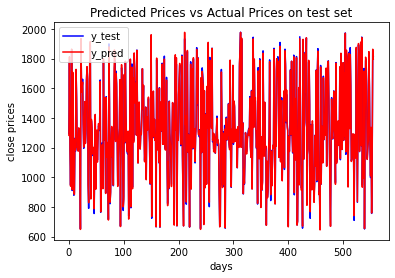

In [47]:
plt.plot(points, y_test, color='blue', label='y_test')
plt.plot(points, y_pred, color='red', label='y_pred')
plt.ylabel('close prices')
plt.xlabel('days')
plt.title('Predicted Prices vs Actual Prices on test set')
plt.legend(loc='upper left')

In [48]:
plt.show()

# Predict values using the x_test_ff set which is untouched

In [49]:
x_test_df['Price_prediction'] = model.predict(x_test_df.loc[:,predictors])

In [50]:
df1= pd.DataFrame(x_test_df.Price_prediction)

In [51]:
df11 = df1['Price_prediction'].squeeze()

In [52]:
df11

Date
2014-09-09    1252.847050
2015-04-14    1189.956770
2019-09-18    1499.613524
2018-10-11    1217.266678
2009-07-19     946.809158
2011-07-14    1581.882612
2014-07-28    1306.793149
2021-08-15    1782.215119
2011-08-01    1622.157231
2018-08-19    1190.211080
2018-06-24    1273.733090
2010-03-01    1119.534440
2020-09-27    1857.624169
2014-08-20    1284.511298
2010-07-14    1209.038227
2009-01-23     872.012009
2016-07-20    1320.200032
2013-02-05    1675.952643
2018-11-06    1234.026918
2010-11-15    1364.923593
2014-04-01    1290.550363
2022-04-24    1924.247075
2008-12-12     824.966470
2011-06-10    1536.198792
2020-06-26    1770.949456
2013-06-07    1380.387523
2022-02-11    1860.976375
2014-02-20    1319.548405
2008-05-06     875.079115
2010-12-09    1385.166655
2010-06-10    1221.906716
2020-06-08    1690.928469
2014-08-15    1302.615629
2019-07-29    1420.733705
2017-12-12    1238.412314
2008-07-18     951.873705
2014-03-18    1354.831954
2009-06-04     977.594101
2022-05

In [53]:
df2 = pd.DataFrame(x_test_df.Close)

In [54]:
df22=df2['Close'].squeeze()

In [55]:
df22

Date
2014-09-09    1254.830
2015-04-14    1191.759
2019-09-18    1494.685
2018-10-11    1218.562
2009-07-19     946.333
2011-07-14    1578.043
2014-07-28    1309.663
2021-08-15    1774.508
2011-08-01    1627.478
2018-08-19    1187.898
2018-06-24    1267.369
2010-03-01    1118.281
2020-09-27    1858.328
2014-08-20    1280.219
2010-07-14    1210.982
2009-01-23     898.908
2016-07-20    1318.728
2013-02-05    1672.235
2018-11-06    1230.378
2010-11-15    1360.708
2014-04-01    1283.672
2022-04-24    1915.393
2008-12-12     821.501
2011-06-10    1531.273
2020-06-26    1770.898
2013-06-07    1381.965
2022-02-11    1857.898
2014-02-20    1320.930
2008-05-06     875.528
2010-12-09    1390.923
2010-06-10    1218.444
2020-06-08    1701.708
2014-08-15    1304.487
2019-07-29    1425.675
2017-12-12    1241.781
2008-07-18     953.860
2014-03-18    1353.652
2009-06-04     979.316
2022-05-13    1810.678
2010-06-17    1243.915
2016-03-14    1230.402
2015-05-08    1187.880
2009-02-19     975.138
2020-0

# Creating the signal

In [56]:
x_test_df['Model_signal'] = np.where(df11 > df22, 1, -1)

In [57]:
x_test_df.head()

Open      High       Low     Close Volume    Ema_short  \
Date                                                                     
2014-09-09  1253.630  1257.800  1247.479  1254.830   1381  1267.876445   
2015-04-14  1194.176  1198.998  1183.970  1191.759   1381  1198.478547   
2019-09-18  1501.605  1511.558  1483.155  1494.685   1380  1501.324959   
2018-10-11  1197.519  1226.282  1196.828  1218.562   1380  1199.311885   
2009-07-19   936.445   946.567   936.170   946.333    615   931.616202   

               Ema_long        Rsi   Obv Price_prediction Model_signal  
Date                                                                    
2014-09-09  1282.386383  31.592922  1381      1252.847050           -1  
2015-04-14  1196.043073  47.935488  1381      1189.956770           -1  
2019-09-18  1500.878209  46.597578  1380      1499.613524            1  
2018-10-11  1198.749519  62.372728  1380      1217.266678           -1  
2009-07-19   931.705090  61.100094   615       946.809158            1

In [58]:
df3=pd.DataFrame(x_test_df.Model_signal)

In [59]:
df3

Model_signal
Date                   
2014-09-09           -1
2015-04-14           -1
2019-09-18            1
2018-10-11           -1
2009-07-19            1
2011-07-14            1
2014-07-28           -1
2021-08-15            1
2011-08-01           -1
2018-08-19            1
2018-06-24            1
2010-03-01            1
2020-09-27           -1
2014-08-20            1
2010-07-14           -1
2009-01-23           -1
2016-07-20            1
2013-02-05            1
2018-11-06            1
2010-11-15            1
2014-04-01            1
2022-04-24            1
2008-12-12            1
2011-06-10            1
2020-06-26            1
2013-06-07           -1
2022-02-11            1
2014-02-20           -1
2008-05-06           -1
2010-12-09           -1
2010-06-10            1
2020-06-08           -1
2014-08-15           -1
2019-07-29           -1
2017-12-12           -1
2008-07-18           -1
2014-03-18            1
2009-06-04           -1
2022-05-13            1
2010-06-17           -1
2016-03-14            1
2015-05-08           -1
2009-02-19            1
2020-07-13            1
2015-10-04           -1
2016-01-11            1
2017-08-18            1
2014-06-04            1
2009-03-13           -1
2019-06-11            1
2018-09-23            1
2015-12-27           -1
2015-01-29           -1
2013-03-14           -1
2007-02-02            1
2016-08-25            1
2014-09-26            1
2013-12-13           -1
2015-07-23            1
2020-03-30           -1
2011-02-27           -1
2013-10-16           -1
2011-11-14           -1
2022-02-14            1
2015-05-01            1
2021-03-28            1
2020-05-06           -1
2021-02-05           -1
2013-01-08            1
2015-12-11           -1
2020-07-10            1
2020-12-10            1
2018-08-13            1
2019-07-03            1
2010-09-28           -1
2018-06-13           -1
2008-10-29            1
2007-08-02           -1
2014-02-25           -1
2016-01-06           -1
2021-06-27            1
2009-01-07           -1
2011-11-24           -1
2018-07-19           -1
2010-04-12            1
2012-02-17            1
2015-01-25            1
2018-02-01           -1
2007-03-04            1
2019-02-19           -1
2011-02-17           -1
2020-08-14            1
2009-05-14           -1
2018-07-04            1
2012-06-01           -1
2021-12-22           -1
2017-05-17           -1
2019-08-18            1
2012-02-26           -1
2008-06-08           -1
2020-12-28            1
2016-09-29           -1
2015-02-11            1
2012-04-08            1
2022-04-10            1
2010-02-19            1
2008-02-12            1
2014-12-09           -1
2021-04-01           -1
2010-08-13            1
2009-12-18            1
2009-08-04           -1
2019-11-19           -1
2020-05-17           -1
2016-03-24            1
2017-05-28            1
2013-11-15           -1
2008-02-03            1
2021-09-19           -1
2015-08-05            1
2008-11-26            1
2010-04-07           -1
2021-03-30           -1
2015-06-26            1
2011-10-30            1
2022-04-01            1
2016-12-06           -1
2010-01-05           -1
2009-10-12           -1
2015-12-18            1
2013-10-22            1
2021-04-22            1
2012-09-27           -1
2009-07-06           -1
2009-05-08           -1
2011-08-12            1
2008-03-24           -1
2015-06-17           -1
2021-10-14            1
2009-10-20            1
2018-04-03           -1
2020-10-27            1
2011-02-13           -1
2011-05-02            1
2016-02-17           -1
2018-05-10           -1
2007-11-13            1
2021-05-13           -1
2017-12-22           -1
2014-02-19            1
2017-03-16            1
2011-08-09            1
2018-08-31            1
2009-03-30           -1
2016-02-09            1
2020-06-23           -1
2018-10-14           -1
2020-12-23            1
2017-02-17            1
2018-07-01            1
2021-03-21            1
2019-02-10            1
2012-01-10           -1
2015-01-23           -1
2019-09-05           -1
201

# Creating the signal

In [60]:
def compute_ret(df): 
    df['Daily_return'] = df['Close']/df['Close'].shift(1)-1
    df['Daily_return_log'] = np.log(df['Close']/df['Close'].shift(1))
    df['Cumulative_return'] = np.cumsum(df['Daily_return'])
    df['Strategy_return']=df['Daily_return']*df3['Model_signal'].shift(1)
    df['Cumulative_strategy_return']=np.cumsum(df['Strategy_return'])
    return df

In [61]:
df4=compute_ret(x_test_df)

ValueError: Expected a 1D array, got an array with shape (1432, 2)

In [ ]:
df4.head()

# Return of bencmark and strategy

In [ ]:
df4['Cumulative_return'].plot(figsize=(8,4))
df4['Cumulative_strategy_return'].plot(figsize=(8,4))
plt.legend(loc='upper right')
plt.show()

In [ ]:
def sharpe(df):    
    sharpe_ratio = df.Strategy_return.mean()/df.Strategy_return.std()*np.sqrt(252)
    return sharpe_ratio

In [ ]:
print(sharpe(df4))

# Quick plot of real values compared to predicted valuer on untouched set

In [ ]:
%matplotlib inline

In [ ]:
plt.plot(range(len(y_test_df['Close_nextday'])), y_test_df['Close_nextday'], color='blue', label='Actual Price')
plt.plot(range(len(y_test_df['Close_nextday'])), x_test_df['Price_prediction'], color='red', label='Predicted Price')
plt.ylabel('close prices')
plt.xlabel('Days')
plt.title('Predicted Prices vs Actual Prices on untouched set')
plt.legend(loc='upper left')

In [ ]:
import something